# Real Estate Predictioneering: 
## Determining What Factors Best Predict Home Sale Prices

### **Stephen Re**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project was to introduce linear regression modeling in python using home sales data and trying to predict the price based on the features of the individual homes.  The data was combined, cleaned and split into training and testing data.  Linear regression modeling was done using independent variables determined by running a correlation of each independent variable against the sale price of the home.  In the end, I used 9 numeric and 4 categorical variables to find the best R2 value for the training and test sets.  The final result was a training score of `R2 = 0.92` and `R2 = 0.87` when ran against the test data

[Back to top](#Index)


## 1. Introduction
There are many factors that go into the prices of a home.  While specific prices change as market conditions change, it is possible to determine what features of a home contribute to its prices.  According to Experian, there are 5 main factors that influence the sale price of homes:
- Price of comparable properties
- Neighborhood
- Home Age and Condition
- Home Size
- Housing market conditions

Understanding the impact of these features will help home owners to make informed choices when preparing their homes for sale, or when hunting for their new home.  

The data used for this analysis comes from recent home sales in Ames, Iowa, and contains a wide variety of specific features for each sold property.  We will use a linear regression model to determine which of these features best predicts the sale price of a house.

In order to do this we will use 2 sets of data, a training and testing set.  Both sets will be imported into this notebook, and cleaned and enhanced in the same way. Then we will train a linear regression model with the training data and run the test data through it to see how well the features we chose in the training set predict the sale prices in the test set.

[Back to top](#Index)

## 2. The Data

In order to make our inferences with the lineaer regression, we will have to import and prepare the raw data.  Below, I have imported the 2 datasets and concatenated them together so I can clean them in one set of steps.  When it comes time to run the model, I will break the sets out between train and test.

I ran a couple of quick visuals to get a feel for the distribution of the data for the SalePrice variable and a couple of other vareiables I thought would be predictive.




[Back to top](#Index)

### 2.1 Import the Data

In order to make our inferences with the lineaer regression, we will have to import and prepare the raw data.  Below, I have imported the 2 datasets and concatenated them together so I can clean them in one set of steps.  When it comes time to run the model, I will break the sets out between train and test.

In [773]:
# Import Needed Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Setting the number of rows and columns to be displayed in a cell output to make analysis easier.
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

In [774]:
# importing raw train and test data files
raw_train = pd.read_csv('houseSmallData.csv')
raw_test = pd.read_csv('jtest.csv')


In [775]:
# Deliniating which set is train and test, then concatenating them together.  
# Since the column names and data types are identical between the 2 sets we will be able to clean and enhance the data in one set of steps.
# When it comes time for analysis, we will split the sets using the 'set' column.
raw_train['set'] = 'Train'
raw_test['set'] = 'Test'

raw_full_set = pd.concat([raw_train, raw_test], ignore_index=True)

[Back to top](#Index)

### 2.2 Data Exploration

To get a quick feel for the raw data before cleaning, I ran some queries to view and describe the data and some charts to see the distribution of data in columns i wanted to use in the analysis.

See comments below for details.


In [776]:
# visualize top rows of dataset.
raw_full_set.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,set
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Train
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Train
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Train
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Train
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Train


In [777]:
# .info() on the raw df to get a list of the columns, their data types and number of values in each.  
# That showed me which columns needed either dropping or cleaning
# We have 83 columns including the new 'set' column and 'SalePrice' which we are trying to predict.
raw_full_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     200 non-null    int64  
 1   Id             200 non-null    int64  
 2   MSSubClass     200 non-null    int64  
 3   MSZoning       200 non-null    object 
 4   LotFrontage    164 non-null    float64
 5   LotArea        200 non-null    int64  
 6   Street         200 non-null    object 
 7   Alley          9 non-null      object 
 8   LotShape       200 non-null    object 
 9   LandContour    200 non-null    object 
 10  Utilities      200 non-null    object 
 11  LotConfig      200 non-null    object 
 12  LandSlope      200 non-null    object 
 13  Neighborhood   200 non-null    object 
 14  Condition1     200 non-null    object 
 15  Condition2     200 non-null    object 
 16  BldgType       200 non-null    object 
 17  HouseStyle     200 non-null    object 
 18  OverallQua

In [778]:
# show basic stats of columns i thought would be useful.
raw_train[['SalePrice', 'YearBuilt', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageArea','FullBath' , 'HalfBath', 'YearRemodAdd']].describe().round()

,SalePrice,YearBuilt,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageArea,FullBath,HalfBath,YearRemodAdd
count,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
mean,173821.0,1971.0,1449.0,3.0,6.0,466.0,2.0,0.0,1984.0
std,72237.0,29.0,471.0,1.0,1.0,199.0,1.0,0.0,21.0
min,40000.0,1910.0,520.0,0.0,4.0,0.0,0.0,0.0,1950.0
25%,129362.0,1955.0,1084.0,2.0,5.0,352.0,1.0,0.0,1965.0
50%,153750.0,1970.0,1350.0,3.0,6.0,480.0,1.0,0.0,1994.0
75%,207750.0,2000.0,1717.0,3.0,7.0,576.0,2.0,1.0,2003.0
max,438780.0,2009.0,2945.0,4.0,11.0,894.0,3.0,1.0,2009.0


### Distribution of Data
Ran some boxplots and histograms to get a look at the distribution of some of the columns i planned on using in the analysis.

#### YearBuilt Distribution
Boxplot by YearBuilt was too crowded so I did it by decade built.  

Shows, as expected, a rising relationship with price as the houses become newer.

Houses from the 80s and 2000s have the biggest outliers.

But, there is little movement on price between houses built in the 1910s and 1960s.

Text(0.5, 0.98, 'YearBuilt Distribution in Training Data')

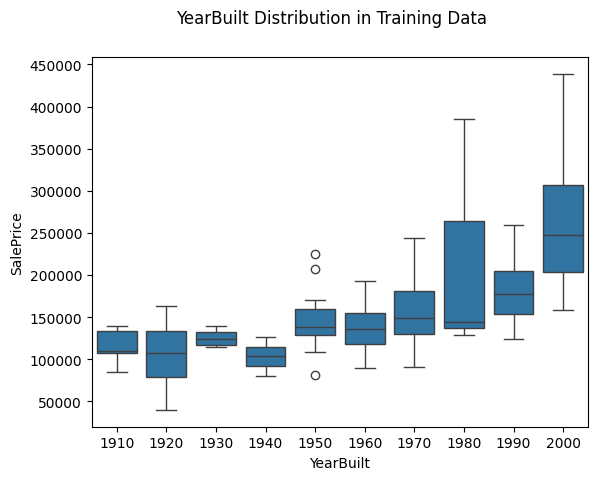

In [779]:
sns.boxplot(x=raw_train['YearBuilt'] - raw_train['YearBuilt']%10, y=raw_train['SalePrice']).figure.suptitle('YearBuilt Distribution in Training Data')

#### Remodel Year Distribution
The age of remodel does not seem to be nearly as strongly related to SalePrice as YearBuilt

Text(0.5, 0.98, 'YearRemodAdd Distribution in Training Data')

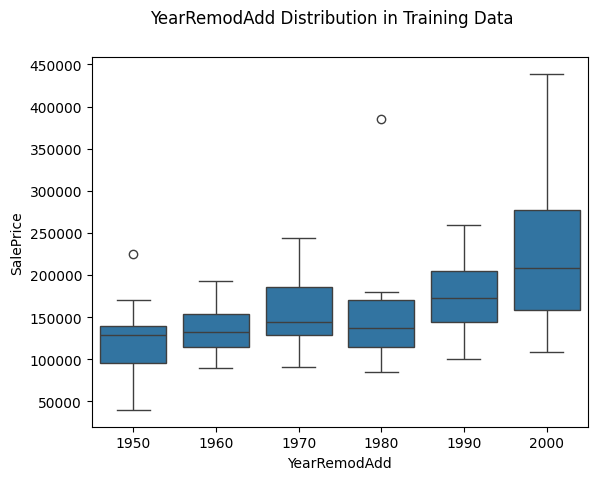

In [780]:
sns.boxplot(x=raw_train['YearRemodAdd'] - raw_train['YearRemodAdd']%10, y=raw_train['SalePrice']).figure.suptitle('YearRemodAdd Distribution in Training Data')

#### Overall Quality Distribution
OverallQual shows a strong relationship with price as would be expected.

Text(0.5, 0.98, 'Overall Quality Distribution in Training Data')

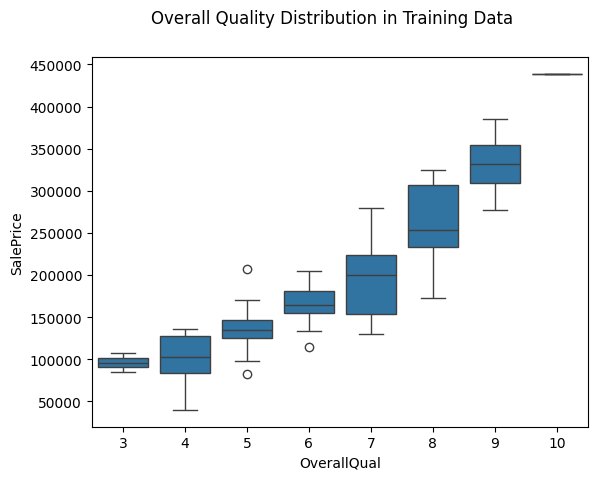

In [781]:
sns.boxplot(x=raw_train['OverallQual'], y=raw_train['SalePrice']).figure.suptitle('Overall Quality Distribution in Training Data')

#### Overall Condition Distribution
OverallCond, however, does not show a strong relationship with price.  
So even houses in moderate shape are selling for as much or more than houses in exelent condition.

Text(0.5, 0.98, 'Overall Condition Distribution in Training Data')

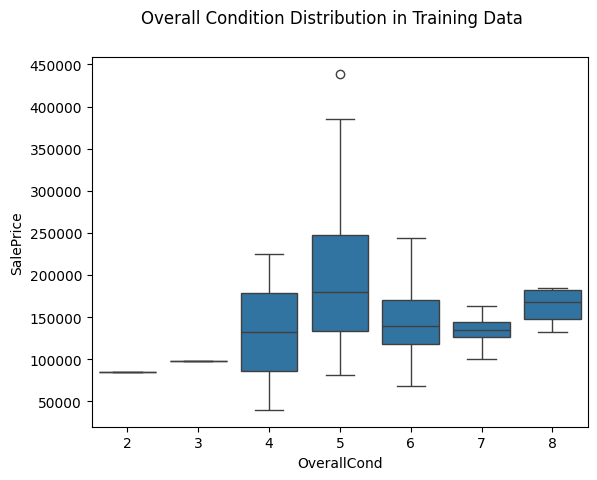

In [782]:
sns.boxplot(x=raw_train['OverallCond'], y=raw_train['SalePrice']).figure.suptitle('Overall Condition Distribution in Training Data')

### SalePrice Distibution
SalePrice is skewed right with the majority of individual sales falling below the average. 

In [783]:
# common specs for the plots
def specs(x, **kwargs):
    plt.axvline(x.mean(), c='k', ls='-', lw=2.5, label='mean')
    plt.axvline(x.median(), c='orange', ls='--', lw=2.5, label = 'median')
    plt.legend(loc='upper right')

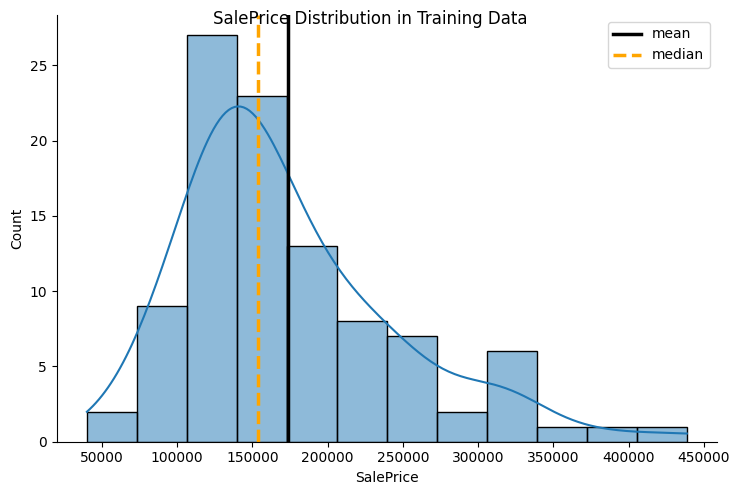

In [784]:
saleprice_hist = sns.displot(
    raw_train['SalePrice'], 
    kde=True, 
    aspect=1.5
)

saleprice_hist.map(specs,'SalePrice').figure.suptitle('SalePrice Distribution in Training Data')

for ax in saleprice_hist.axes.flat:
    ax.legend(loc='upper right')

### Square Foot Living Area Distribution 
Similarly, living area sqr feet is skewed right with the majority of individual homes falling below the average. 
This isnt as heavy a skew as SalePrice, however, which tells me that there is probably an correlation, but not a perfect one. 
There will be houses with similar sqrft, but different prices.

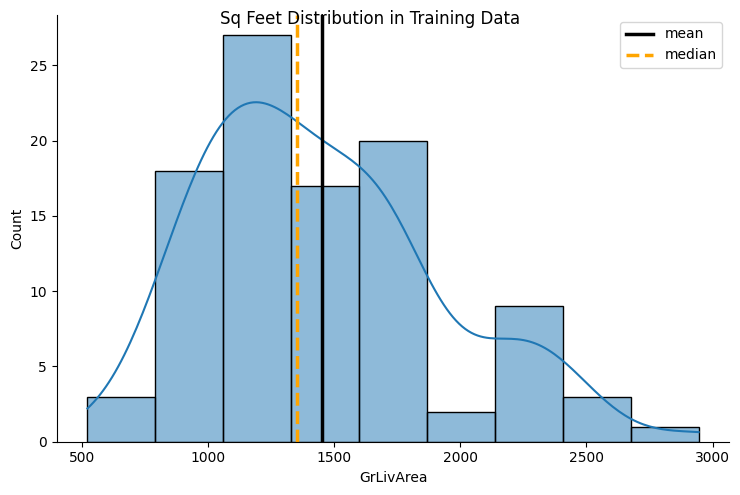

In [785]:
sqf_hist = sns.displot(
    data=raw_train, x='GrLivArea',
    kde=True,
    aspect=1.5
)

sqf_hist.map(specs,'GrLivArea' ).figure.suptitle('Sq Feet Distribution in Training Data')

for ax in sqf_hist.axes.flat:
    ax.legend(loc='upper right')

### YearBuilt Distribution
The houses sold in this dataset were weighted pretty heavily toward newer construction with a quite a few built in the post-war years.

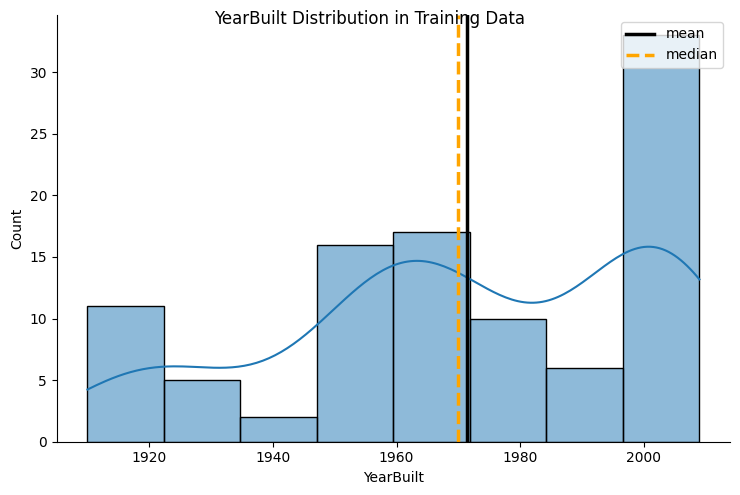

In [786]:
yearbuilt_hist = sns.displot(
    data=raw_train, x='YearBuilt',
    kde=True,
    aspect=1.5
)

yearbuilt_hist.map(specs,'YearBuilt' ).figure.suptitle('YearBuilt Distribution in Training Data')

for ax in yearbuilt_hist.axes.flat:
    ax.legend(loc='upper right')

### Average Sale Price by Neighborhood
Here we can see that StoneBr is by far the most expensive neighborhood with an average price 140k higher than the next highest neighborhood.

In [787]:
avg_sale_price = raw_train.groupby('Neighborhood')['SalePrice'].mean().reset_index().sort_values(by='SalePrice',ascending=False).round()
avg_sale_price.columns = ['Neighborhood', 'Avg SalePrice']
avg_sale_price.head()


,Neighborhood,Avg SalePrice
17,StoneBr,438780.0
12,NridgHt,295389.0
19,Veenker,283250.0
11,NoRidge,255000.0
16,Somerst,227740.0


Text(0.5, 1.0, 'Average Sale Price by Neighborhood in Training Data')

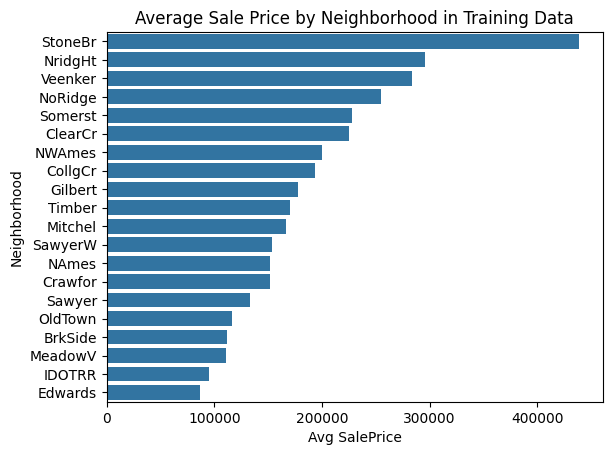

In [788]:
Neighborhood_bar = sns.barplot(y='Neighborhood', x='Avg SalePrice', data=avg_sale_price, orient='h')
plt.title('Average Sale Price by Neighborhood in Training Data')

[Back to top](#Index)

### 2.3 Data Preparation

To prep the data, I followed these steps:
- Dropped several unneeded columns that had little or no data, or had no logical way to fill in NaNs
- Added several calculated columns that added together several similar columns into an aggregated numbers.  Example is adding basement sqft to above grade sqft to get a total sqft column.
- In some of the categorical columns, there are NaNs.  For all of these columns, the data description shows that 'NA' as an option, but none of these columns had 'NA', only NaNs.  I made the assumption that these blank values are 'NA', but were just never recorded as such in the data.  I filled in these NaNs using .fillna('NA')
- 'GarageYrBlt' had a small number of missing values, so i used interpolate to fill them in.
- Ran the categorical columns through on-hot encoding to break them out into numeric columns
- Split the dataset back into training and testing sets.  Now we have 3 sets including the full set.

In [789]:
# making copy of raw set 
clean_full_df = raw_full_set.drop(['LotFrontage', 'Alley', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'Utilities'], axis=1).copy()

In [790]:
# adding calculated columns
clean_full_df['AbvGrdBath'] = clean_full_df['FullBath'] + (clean_full_df['HalfBath']*.5)
clean_full_df['TotalBath'] = clean_full_df['FullBath'] + (clean_full_df['HalfBath']*.5) + clean_full_df['BsmtFullBath'] + (clean_full_df['BsmtHalfBath']*.5)
clean_full_df['TotFnshSF'] = clean_full_df['BsmtFinSF1'] + clean_full_df['GrLivArea']
clean_full_df['TotSF'] = clean_full_df['TotalBsmtSF'] + clean_full_df['GrLivArea']    
clean_full_df['HouseAge'] = dt.today().year - clean_full_df['YearBuilt']
clean_full_df['HouseDecade'] = clean_full_df['YearBuilt'] - clean_full_df['YearBuilt']%10
clean_full_df['RemodelAge'] = dt.today().year - clean_full_df['YearRemodAdd']
clean_full_df['RemodelDecade'] = clean_full_df['YearRemodAdd'] - clean_full_df['YearRemodAdd']%10

In [791]:
#filling NaN with 'NA'.  All of these columns had 'NA' as a type as descripbed in the data_description.txt file.  instead they were left blank.
clean_full_df[
    ['BsmtQual', 'FireplaceQu', 'MasVnrType', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'GarageType','GarageFinish','GarageQual','GarageCond','BsmtExposure']] = clean_full_df[
    ['BsmtQual', 'FireplaceQu', 'MasVnrType', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'GarageType','GarageFinish','GarageQual','GarageCond','BsmtExposure']].fillna('NA')

In [792]:
# interpolating GarageYrBlt to fill in a few missing values
clean_full_df['GarageYrBlt'] = clean_full_df['GarageYrBlt'].interpolate()

In [793]:
# checking to see if there are any NaNs left
clean_full_df[clean_full_df.isna().any(axis=1)]

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,set,AbvGrdBath,TotalBath,TotFnshSF,TotSF,HouseAge,HouseDecade,RemodelAge,RemodelDecade


In [794]:
# splitting out numeric and categorical columns for further processing
all_num_cols = clean_full_df.select_dtypes(include=[np.number]).columns
all_cat_cols = clean_full_df.select_dtypes(exclude=[np.number]).columns.drop(['set'])

In [795]:
# running one-hot encoding on categorical columns, then recombining with numeric columns to form fully transformed dataset
cat_df = clean_full_df[all_cat_cols]

# One-hot encode the categorical variables
encoder = OneHotEncoder(drop='first')
full_df_encoder = encoder.fit(cat_df)
X_encoded = full_df_encoder.transform(cat_df).toarray()

# Create a DataFrame from the encoded features
encoded_feature_names = full_df_encoder.get_feature_names_out(all_cat_cols)
full_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# recombine dataset into final shape
full_transformed_df = pd.concat([clean_full_df['set'], clean_full_df[all_num_cols], full_encoded_df], axis=1) 
full_transformed_df.head()

,set,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,AbvGrdBath,TotalBath,TotFnshSF,TotSF,HouseAge,HouseDecade,RemodelAge,RemodelDecade,MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Pave,...,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_TA,GarageCond_Gd,GarageCond_NA,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,Train,0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,2008,208500,2.5,3.5,2416,2566,21,2000,21,2000,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Train,1,2,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,2007,181500,2.0,2.5,2240,2524,48,1970,48,1970,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Train,2,3,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,2008,223500,2.5,3.5,2272,2706,23,2000,22,2000,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Train,3,4,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,2,2006,140000,1.0,2.0,1933,2473,109,1910,54,1970,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Train,4,5,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,2008,250000,2.5,3.5,2853,3343,24,2000,24,2000,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [796]:
# splitting transformed df into train and test parts.  now we have 3 sets including full_transformed_df
train_transformed_df = full_transformed_df[full_transformed_df['set'] == 'Train']
test_transformed_df = full_transformed_df[full_transformed_df['set'] == 'Test']

[Back to top](#Index)

### 2.4 Correlation


#### Numeric Column Correlations

In the training dataset, I ran a correlation on the numeric columns with SalePrice and found that many of my assumptions about which features would be most predictive were at the top of the list.  This included some of the aggregate columns I made such as total square feet and total baths.  I will experiment with these top columns first to find a good predictive model.

In [797]:
# SalePrice correlation in training data
num_corr = train_transformed_df[all_num_cols].corr()
# num_corr['SalePrice'].sort_values(ascending=False)
num_corr_df = pd.DataFrame(num_corr['SalePrice'].sort_values(ascending=False))
num_corr_df.head(10)

,SalePrice
SalePrice,1.000000
OverallQual,0.855061
TotSF,0.799429
GrLivArea,0.735129
GarageArea,0.688249
TotalBath,0.673733
TotFnshSF,0.665976
HouseDecade,0.664194
GarageCars,0.663441
YearBuilt,0.658636


#### Categorical Column Scores
Running correlations on categorical data is tricky.  After doing some research, and experimentation with factorizing the categories, I decided the best way to determine if a categorical feature might be predictive would be to just run it through a linear regression model.  

So, I ran a model for each of the already encoded categorical feature and added them to a dataframe to display them like i did the numeric correlations.

Neighborhood came out on top as i would have expected, but the next highest was basement quality which i found odd.  In the end i did not end up using either of those columns.  In fact, I found that many of the categorical columns that showed promise here were not helpful in the final model, including neighborhood.

In [798]:
# running model scores on all category columns one at a time
train_y = train_transformed_df['SalePrice']

scorelist = []
for name in all_cat_cols:
    #finds all the encoded columns with names with the original column name in them
    enc_cols = [col for col in train_transformed_df.columns if name in col]
    #creating the X set of columns
    train_cat_X = train_transformed_df[enc_cols]
    #building and running the model
    cat_model = LinearRegression().fit(train_cat_X, train_y)
    score = cat_model.score(train_cat_X, train_y)
    scorelist.append((name,score))
    
scores = pd.DataFrame(scorelist, columns=['column','score'])
scores.sort_values(by=['score'], ascending=False).head(10)

,column,score
6,Neighborhood,0.758796
19,BsmtQual,0.624422
16,ExterQual,0.563629
28,KitchenQual,0.471885
32,GarageFinish,0.435897
30,FireplaceQu,0.408162
31,GarageType,0.381646
13,Exterior1st,0.379732
15,MasVnrType,0.375685
18,Foundation,0.295875



[Back to top](#Index)

## 3. Project Description

I improved on Dr Williams' analysis by using more columns than he did.  I used the columns that came up as the most correlated to SalePrice, and that immediately gave me a better score than he got in my LR model.  I then tweaked it by using different columns near the top of the correlation output to get the best results i could with the numeric columns.  I then added catagorical columns to the model and continued iterating until I get the best score I could.

The relationships I found with the numeric columns made a lot of sense.  They were the most correlated with SalesPrice.  Some of the features I used were calculated columns that added together similar columns like FullBath and HalfBath to get a TotalBath column.  These proved very effective for the analysis.

The columns I used make sense in the context of buying or selling a home.  The things I look for are quality, square feet of space, number of bathrooms, number of bedrooms, size of garage, etc.

[Back to top](#Index)

### 3.1 Linear Regression

In essence, a linear regression shows the relationship between one or more independent variables, and a dependent variable that we want to predict.  In our case, we are studying housing prices and trying to predict what they will be based on variables that describe aspects of the home like home size, number of bedrooms and bathrooms, etc.

To do our predictions, we will draw a straight line that best fits evenly between all of the data points using y = mx + b, or in statistics terms, Y = a + bX where: 
- Y is the dependent variable we are trying to predict
- a is the y intercept, 
- b is the slope of the line 
- X is the independent variable
From that line, we can predict any future Y.

Since data points is never in a nice neat straight line, we need to draw a line of best fit that goes between the scattered points.  This is done by minimizing the total vertical distance between the points and the line you are trying to fit.  More specifically, you are trying to minimize the sum of squared errors (the differences in vertical height).  In other other words, you are trying to minimize the error between the prediction, the line, and the actual observation.

Since we know Y in the training data, and we know X, we need to find a and b.
The equation for the slope is:
$$
b = \frac{n(\sum{XY}) - (\sum{X})(\sum{Y})}{n(\sum{X^2}) - (\sum{X})^2}
$$
Which shows the covariance (how x and y move together) / variance (how much X spreads from the mean)

The equation for the y intercept is a:
$$
a = \frac{\sum{Y} - b(\sum{X})}{n}
$$
which shows the average of Y at X=0

To train a model in python, we just need to have our observed Y value column, and our X value columns.  

search_cat_cols = [col for col in full_encoded_df.columns if any(search in col for search in cat_cols)]
X_cat = train_transformed_df[search_cat_cols]
train_X = pd.concat([X_cat, train_transformed_df[num_cols]], axis=1)

Initialize a LinearRegression object and use the .fit(x= ,y= ) method
train_model = LinearRegression().fit(train_X, train_y)

You then have a trained model that you use with your test data.
train_model.predict(test_X)

You can then get your R2 score by using the .score(x=, y=) method.  The R2 is a measure of how will the line approximates real data.  It can be interpreted as the percent of the observations that can be attributed to the regression line.
train_model.score(test_X, test_y)



In essense, 

[Back to top](#Index)

### 3.2 Analysis 

Now that I have my dataset and a direction to look, I created 2 cells to hold the full column list for the numeric and categorical columns in vertical lists.  

I then commented them in and out as I ran many iterations of training model.  The numeric columns i ended up using followed closely with the ones i found in my correlation analysis.  The categorical columns made a huge difference at first.

I improved on the professors model but using more than his columns and by encoding and using the categorical columns.  
I selected the columns i used by starting with the highest scoring in the correlation and LR analysis above.  After that, i used only the numeric columns, ran many iterations until i felt i squeezed as much as i could out of them.  Then i turned to the categorical columns

The below cell has the column sets I used commented out.  Feel free to uncomment them and run the training model with them.  Section 3.3 shows more detail on the results and why I chose the columns I did.

In [799]:
# num_cols = ['OverallQual', 'TotSF', 'GrLivArea', 'GarageArea', 'TotalBath', 'TotFnshSF', 'HouseDecade', 'GarageCars', 'YearBuilt']
# cat_cols = []

# num_cols = ['OverallQual', 'OverallCond',  'YearBuilt', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'AbvGrdBath']
# cat_cols = []

# ['OverallQual', 'OverallCond',  'YearBuilt', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'AbvGrdBath']
# cat_cols = ['Neighborhood', 'BsmtQual', 'ExterQual', 'KitchenQual', 'GarageFinish', 'FireplaceQu', 'GarageType', 'Exterior1st', 'MasVnrType', 'Foundation']


[Back to top](#Index)

### 3.3 Results

First try: top 9 correlated numerical columns frm the correlation analysis.\
['OverallQual', 'TotSF', 'GrLivArea', 'GarageArea', 'TotalBath', 'TotFnshSF', 'HouseDecade', 'GarageCars', 'YearBuilt']\
`R2 = 0.8511` Already much better than the professor's results.  The TotSF, TotalBath, TotFnshSF, HouseDecade are all my aggregated columns.

Last try: for just numeric columns: all of the numeric columns I thought would be predictive. \
['OverallQual', 'OverallCond',  'YearBuilt', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'AbvGrdBath']\
`R2 = 0.856`  Slight improvement and as much as i could get using just numeric columns.

Last try before testing.  This time with the above numeric variables and the top 10 categorical variables from my LM analysis.\
['Neighborhood', 'BsmtQual', 'ExterQual', 'KitchenQual', 'GarageFinish', 'FireplaceQu', 'GarageType', 'Exterior1st', 'MasVnrType', 'Foundation']\
`R2 = 0.962`  This greatly imporoved the results.  

The prediction scatterplot looked like an almost straight line, and the training error histogram looked like a normal distribution centered on 0.

I have included the column lists i used below.

In [800]:
# Feel free to comment these in and out to see the results.

# num_cols = ['OverallQual', 'TotSF', 'GrLivArea', 'GarageArea', 'TotalBath', 'TotFnshSF', 'HouseDecade', 'GarageCars', 'YearBuilt']
# cat_cols = []

# num_cols = ['OverallQual', 'OverallCond',  'YearBuilt', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'AbvGrdBath']
# cat_cols = []

num_cols = ['OverallQual', 'OverallCond',  'YearBuilt', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'AbvGrdBath']
cat_cols = ['Neighborhood', 'BsmtQual', 'ExterQual', 'KitchenQual', 'GarageFinish', 'FireplaceQu', 'GarageType', 'Exterior1st', 'MasVnrType', 'Foundation']

In [801]:
# running model training

search_cat_cols = [col for col in full_encoded_df.columns if any(search in col for search in cat_cols)]
X_cat = train_transformed_df[search_cat_cols]
train_X = pd.concat([X_cat, train_transformed_df[num_cols]], axis=1)

train_model = LinearRegression().fit(train_X, train_y)
predict = train_model.predict(train_X)
train_model.score(train_X, train_y)

0.9627668207745105

[Text(0.5, 1.0, 'Train Prediction'), Text(0.5, 0, 'Predicted Value')]

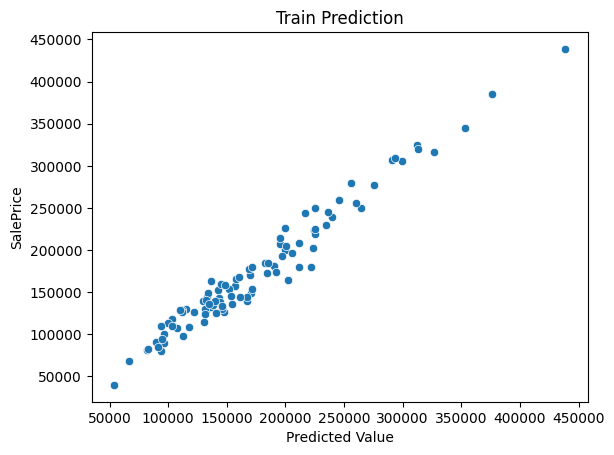

In [802]:
# training model prediction scatterplot
sns.scatterplot(x=predict,y=train_y).set(title='Train Prediction', xlabel='Predicted Value')

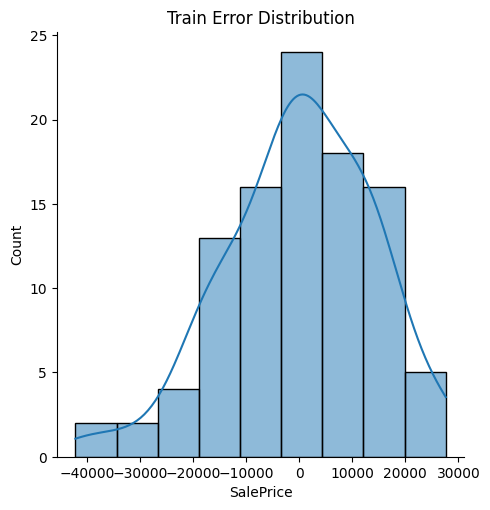

In [803]:
# Training Error Histogram
train_error_hist = sns.displot(train_y - predict, kde=True)
train_error_hist.set(title=('Train Error Distribution'))

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data
I figured with this result, the test would be great!  no, no it was not...

With the large set of numeric and categorical columns, I only scored `R2 = 0.680`.  So, no they were not in accordance with what i found earlier.  

So, i went back to my original numeric only column set and got `R2 = 0.758`

Tried again with the second set of numeric columns and got `R2 = 0.818`.  This is a significant improvement and it beats the professor's scores.

Last, i tried to find a set of categorical columns that would improve on this score.  I ended up on a small set of 4: ['BldgType', 'HouseStyle', 'BsmtQual', 'KitchenQual'].\
Looking at what they represent: type of home (house, condo, etc), home layout, basement quality, and kitchen quality, they all seem like useful stats that i would look for when buying a home, but they aren’t the most important things.  I was banking on Neighborhood being a strong indicator, but it actually made the model worse.\
In the end, i was able to score `R2 = 0.92` value on the training set and `R2 = 0.87` when ran against the test data.

I have included the column lists i used below.

In [804]:
# Feel free to comment these in and out to see the results.

# num_cols = ['OverallQual', 'TotSF', 'GrLivArea', 'GarageArea', 'TotalBath', 'TotFnshSF', 'HouseDecade', 'GarageCars', 'YearBuilt']
# cat_cols = []

# num_cols = ['OverallQual', 'OverallCond',  'YearBuilt', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'AbvGrdBath']
# cat_cols = []

# num_cols = ['OverallQual', 'OverallCond',  'YearBuilt', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'AbvGrdBath']
# cat_cols = ['Neighborhood', 'BsmtQual', 'ExterQual', 'KitchenQual', 'GarageFinish', 'FireplaceQu', 'GarageType', 'Exterior1st', 'MasVnrType', 'Foundation']

num_cols = ['OverallQual', 'OverallCond',  'YearBuilt', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'AbvGrdBath']
cat_cols = ['BldgType', 'HouseStyle', 'BsmtQual', 'KitchenQual']

In [805]:
test_y = test_transformed_df['SalePrice']

search_cat_cols = [col for col in full_encoded_df.columns if any(search in col for search in cat_cols)]
test_X_cat = test_transformed_df[search_cat_cols]
test_X = pd.concat([test_X_cat, test_transformed_df[num_cols]], axis=1)

test_pred = train_model.predict(test_X)
test_score = train_model.score(test_X, test_y)

test_score

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BldgType_2fmCon
- BldgType_Duplex
- BldgType_Twnhs
- BldgType_TwnhsE
- HouseStyle_1.5Unf
- ...
Feature names seen at fit time, yet now missing:
- ExterQual_Fa
- ExterQual_Gd
- ExterQual_TA
- Exterior1st_BrkFace
- Exterior1st_CemntBd
- ...


[Text(0.5, 1.0, 'Test Prediction'), Text(0.5, 0, 'Predicted Value')]

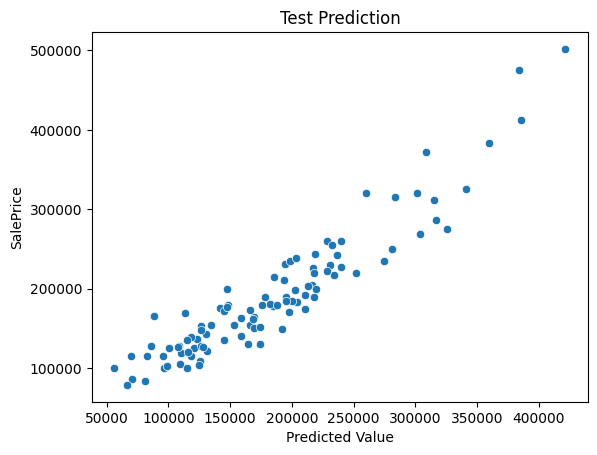

In [ ]:
# test model prediction scatterplot
sns.scatterplot(x=test_pred,y=test_y).set(title='Test Prediction', xlabel='Predicted Value')

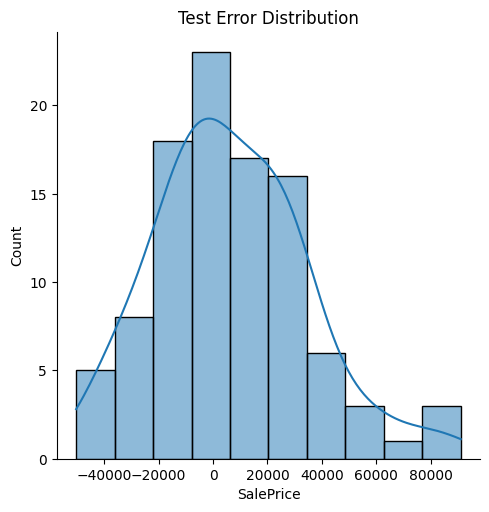

In [ ]:
test_error_hist = sns.displot(test_y - test_pred, kde=True).set(title='Test Error Distribution')

[Back to top](#Index)

### Conclusion

I was able to beat the professor's score by using more columns, and incorporating categorical variables.  However, I think I overfit the training model by using too many columns and my test model suffered.  
Through iterating through the variables, I was able to find a model that was significantly better in both train and test than the professors'.
Other approaches that helped were cleaning both test and train data at the same time.  I ran into trouble when I tried to encode them seperately because some encoded columns were missing between the datasets.  Cleaning them together eliminated that problem.
I also added calculated columns to the dataset to consolidate similar variables into aggregated ones.  Several of those columns were in the top of the correlation analysis.

This was an interesting project.  I learned a lot more about linear regression and correlation, as well as using python in a notebook and creating visuals. I also learned how to do these projects in a more efficient way.  I spent well over 20 hours on this because i kept going down rabbit holes trying to find the perfect answers.

Thank you and I look forward to your comments.


[Back to top](#Index
)
## References

Hayes, Marianne. “**5 Factors That Affect a Home’s Value” [Experian.com](http://Experian.com) March 10, 2022** https://www.experian.com/blogs/ask-experian/factors-that-affect-home-value/

Asked by: [pr338](https://stackoverflow.com/users/4984897/pr338)  Answered by: silviomoreto. “[**How to do linear regression using Python and Scikit learn using one hot encoding?](https://stackoverflow.com/questions/41325227/how-to-do-linear-regression-using-python-and-scikit-learn-using-one-hot-encoding)”.  [stackoverflow.com](http://stackoverflow.com) Dec 25, 2016** https://stackoverflow.com/questions/41325227/how-to-do-linear-regression-using-python-and-scikit-learn-using-one-hot-encoding

Anonymous Author. “**One Hot Encoding in Machine Learning”**  [geeksforgeeks.org](https://www.geeksforgeeks.org/ml-one-hot-encoding/) **21 Mar, 2024.** https://www.geeksforgeeks.org/ml-one-hot-encoding/

Asked by: [Erin Shellman](https://stackoverflow.com/users/1574941/erin-shellman)  Answered by: [sascha](https://stackoverflow.com/users/2320035/sascha). “[**Label axes on Seaborn Barplot](https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot)”. [stackoverflow.com](http://stackoverflow.com)  Jul 26, 2015.** https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot

Anonymous Author. “**Boxplot using Seaborn in Python”**  [geeksforgeeks.org](https://www.geeksforgeeks.org/ml-one-hot-encoding/) 10 Nov, 2020**.** https://www.geeksforgeeks.org/boxplot-using-seaborn-in-python/

[BOBBITT, ZACH](https://www.statology.org/author/admin/). “**How to Add a Title to Seaborn Plots (With Examples)”,** [statology.org](http://statology.org/) April 8, 2021. https://www.statology.org/seaborn-title/

Asked by: [a11](https://stackoverflow.com/users/10976654/a11)  Answered by: [Trenton McKinney](https://stackoverflow.com/users/7758804/trenton-mckinney). “[**How to add a mean and median line to a Seaborn displot](https://stackoverflow.com/questions/67613774/how-to-add-a-mean-and-median-line-to-a-seaborn-displot)”. [stackoverflow.com](http://stackoverflow.com)  Jul 26, 2015.** https://stackoverflow.com/questions/67613774/how-to-add-a-mean-and-median-line-to-a-seaborn-displot

[Ngecha, Michael](https://medium.com/@ngechamike26?source=post_page-----bc1bf1dce3b2--------------------------------).  “**Exploratory Data Analysis (EDA)through Data Visualization.”** [medium.com/](https://medium.com/) **Oct 9, 2023.** https://medium.com/@ngechamike26/exploratory-data-analysis-eda-through-data-visualization-bc1bf1dce3b2

Unable to find Author. “STAT 501 | Regression Methods” online.stat.psu.edu. Penn State University. Accessed 7/3/2024. https://online.stat.psu.edu/stat501/lesson/1/1.2